In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.io as sio

from principal_RBM_alpha import init_RBM, train_RBM, lire_alpha_digit, generer_image_RBM
from principal_DBN_alpha import init_DBN, train_DBN, generer_image_DBN



# RBM analysis 

### We first discuss about the hidden dim

training with epochs = 1000 
n_neurons = 320 512 
learning_rate =  0.01 
batch_size =  50 
on characters :  [2]


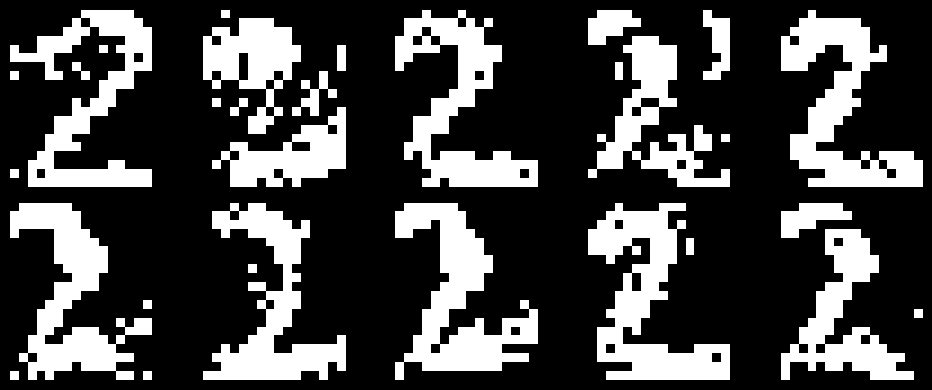

training with epochs = 1000 
n_neurons = 320 256 
learning_rate =  0.01 
batch_size =  50 
on characters :  [2]


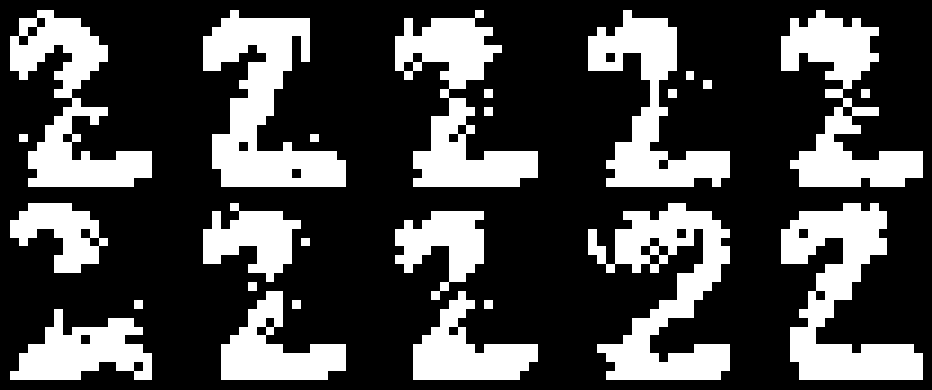

training with epochs = 1000 
n_neurons = 320 128 
learning_rate =  0.01 
batch_size =  50 
on characters :  [2]


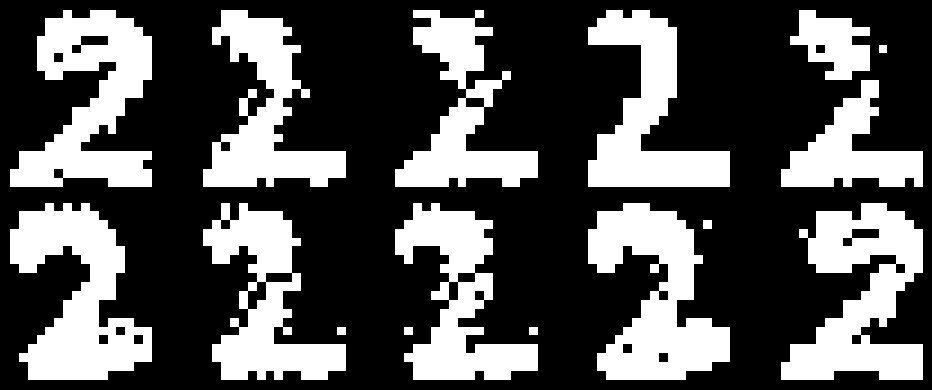

training with epochs = 1000 
n_neurons = 320 64 
learning_rate =  0.01 
batch_size =  50 
on characters :  [2]


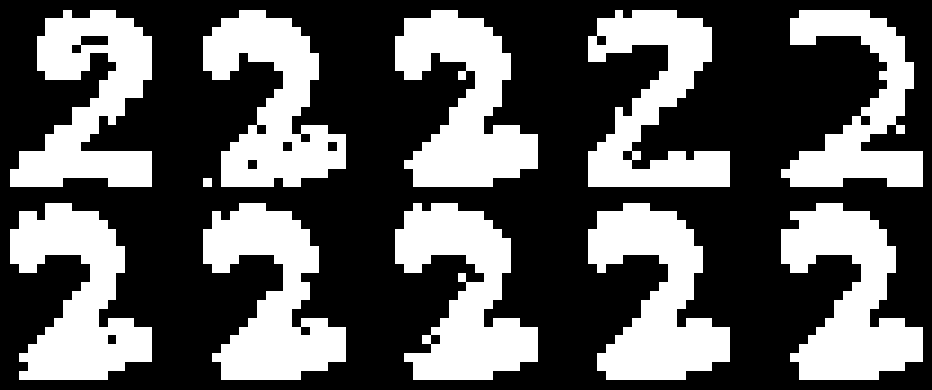

In [2]:
n_neurons = [320, 512, 256, 128, 64]
epochs = 1000
learning_rate = 0.01
batch_size = 50
characters_index = [2]



for index in range(4):
    image =lire_alpha_digit('/Users/pierrefihey/Desktop/DLII/binaryalphadigs.mat', characters_index)
    W,a,b = init_RBM(n_neurons[0], n_neurons[index + 1])
    W,a,b,loss = train_RBM(image, W, a, b, epochs, learning_rate, batch_size, verbose= False)

    print('training with epochs =' , epochs, '\nn_neurons =', n_neurons[0], n_neurons[index + 1], '\nlearning_rate = ', learning_rate, '\nbatch_size = ' , batch_size, '\non characters : ', characters_index )
    n_iter = 1000
    n_imgs = 10

    generer_image_RBM(n_imgs, n_iter, W, a, b)


### We then discuss about the number of different characters in the dataset 

training with epochs = 1000 
n_neurons = 320 64 
learning_rate =  0.01 
batch_size =  50 
on characters :  [2]


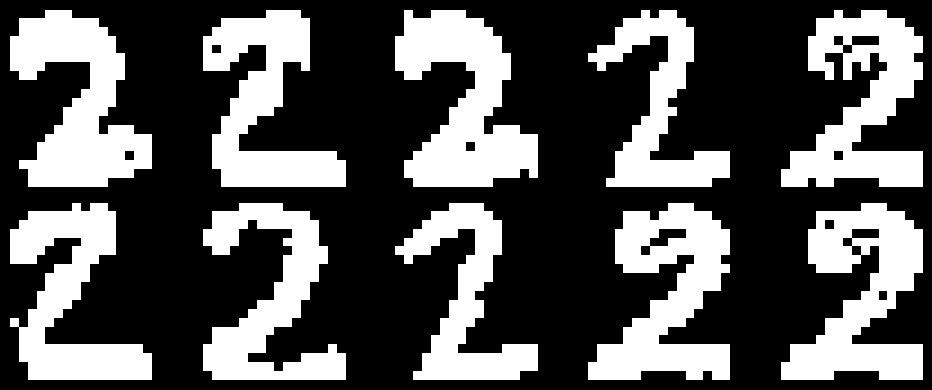

training with epochs = 1000 
n_neurons = 320 64 
learning_rate =  0.01 
batch_size =  50 
on characters :  [2, 4]


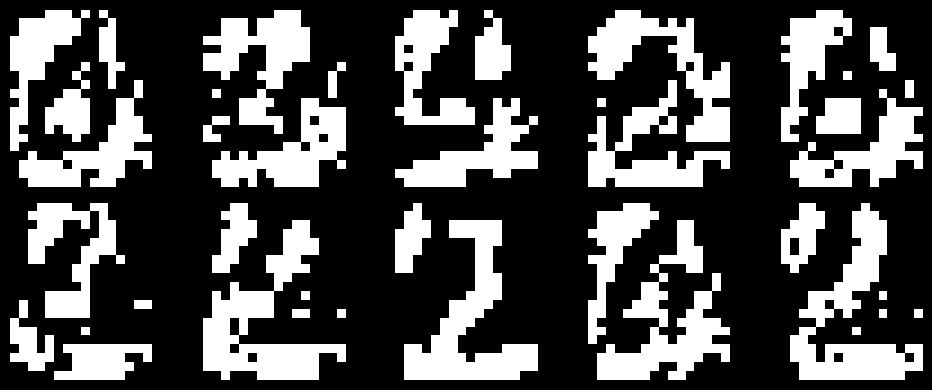

training with epochs = 1000 
n_neurons = 320 64 
learning_rate =  0.01 
batch_size =  50 
on characters :  [2, 4, 9]


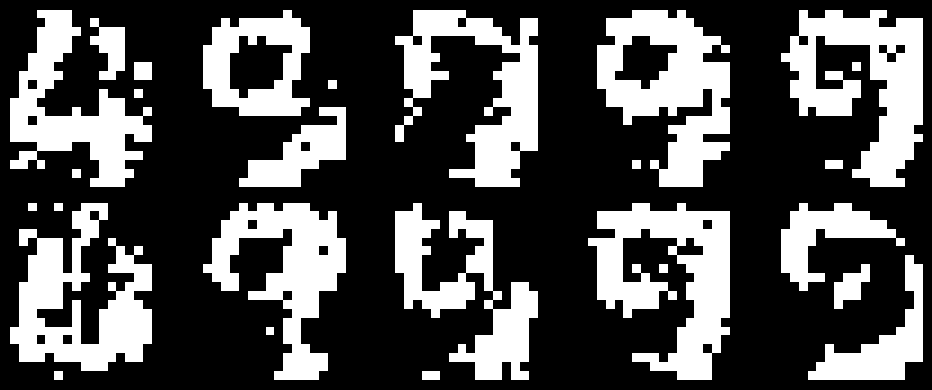

training with epochs = 1000 
n_neurons = 320 64 
learning_rate =  0.01 
batch_size =  50 
on characters :  [2, 4, 9, 16]


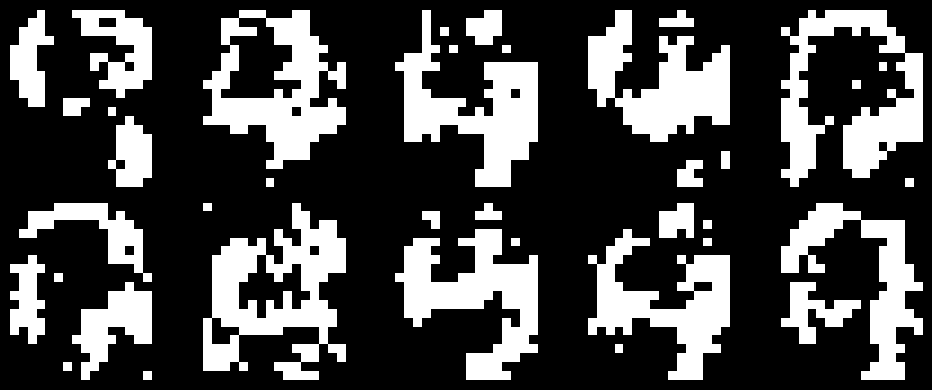

In [3]:
n_neurons = [320, 64]
epochs = 1000
learning_rate = 0.01
batch_size = 50
characters_index = [[2], [2, 4], [2, 4, 9], [2, 4, 9, 16]]



for index in range(4):
    image =lire_alpha_digit('/Users/pierrefihey/Desktop/DLII/binaryalphadigs.mat', characters_index[index])
    W,a,b = init_RBM(n_neurons[0], n_neurons[1])
    W,a,b,loss = train_RBM(image, W, a, b, epochs, learning_rate, batch_size, verbose= False)

    print('training with epochs =' , epochs, '\nn_neurons =', n_neurons[0], n_neurons[1], '\nlearning_rate = ', learning_rate, '\nbatch_size = ' , batch_size, '\non characters : ', characters_index[index] )
    n_iter = 1000
    n_imgs = 10

    generer_image_RBM(n_imgs, n_iter, W, a, b)


# DBN analysis

### We first discuss about the number of hidden layers

3
training with epochs = 1000 
neurons = [320, 64, 64] 
learning_rate =  0.01 
batch_size =  50 
on characters :  [2]


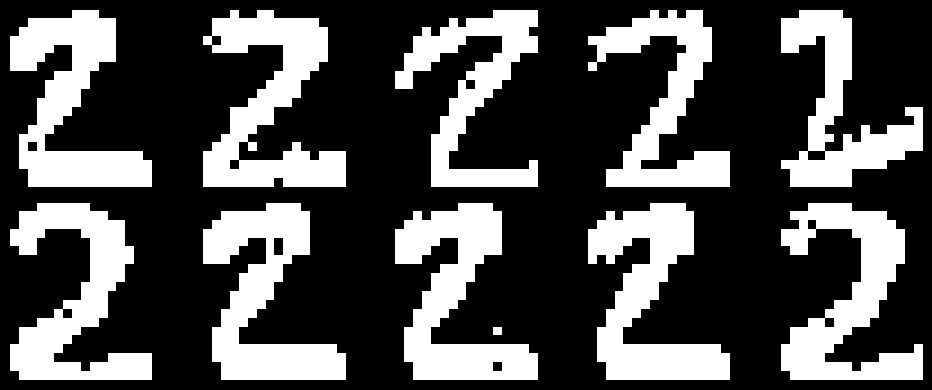

3
training with epochs = 1000 
neurons = [320, 64, 64, 64] 
learning_rate =  0.01 
batch_size =  50 
on characters :  [2]


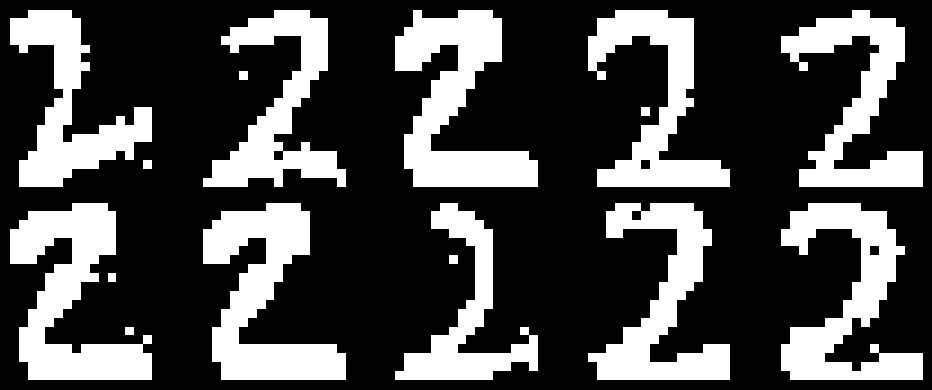

3
training with epochs = 1000 
neurons = [320, 64, 64, 64, 64] 
learning_rate =  0.01 
batch_size =  50 
on characters :  [2]


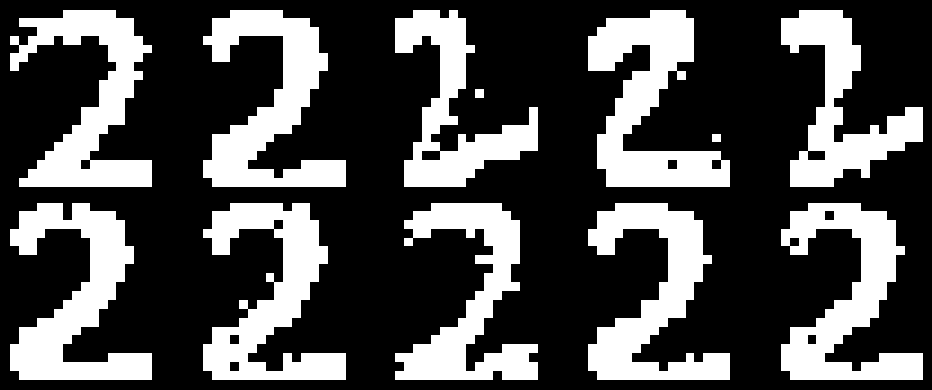

In [11]:
neurons = [[320, 64, 64], [320, 64, 64, 64], [320, 64, 64, 64, 64]]
epochs = 1000
learning_rate = 0.01
batch_size = 50
characters_index = [2]

for index in range(3):
    image =lire_alpha_digit('/Users/pierrefihey/Desktop/DLII/binaryalphadigs.mat', characters_index)
    rbm_list = init_DBN(neurons[index])
    rbm_list, loss = train_DBN(rbm_list, image, epochs, learning_rate, batch_size)

    print('training with epochs =' , epochs, '\nneurons =', neurons[index], '\nlearning_rate = ', learning_rate, '\nbatch_size = ' , batch_size, '\non characters : ', characters_index)
    n_iter = 1000
    n_imgs = 10

    generer_image_DBN(rbm_list, n_imgs, n_iter)

### We then discuss about the number of characters

3
training with epochs = 1000 
neurons = [320, 64, 64, 64, 64] 
learning_rate =  0.01 
batch_size =  50 
on characters :  [2]


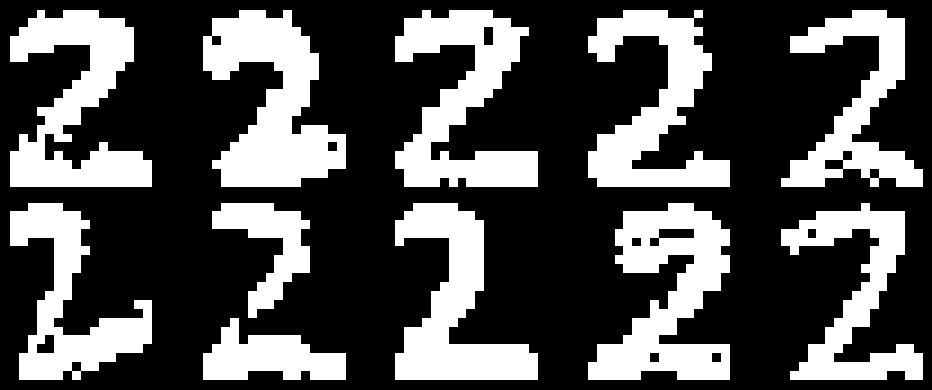

3
training with epochs = 1000 
neurons = [320, 64, 64, 64, 64] 
learning_rate =  0.01 
batch_size =  50 
on characters :  [2, 4]


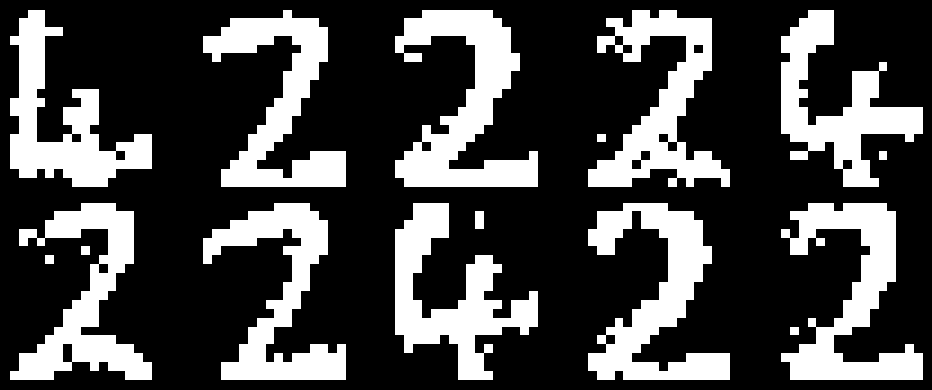

3
training with epochs = 1000 
neurons = [320, 64, 64, 64, 64] 
learning_rate =  0.01 
batch_size =  50 
on characters :  [2, 4, 9]


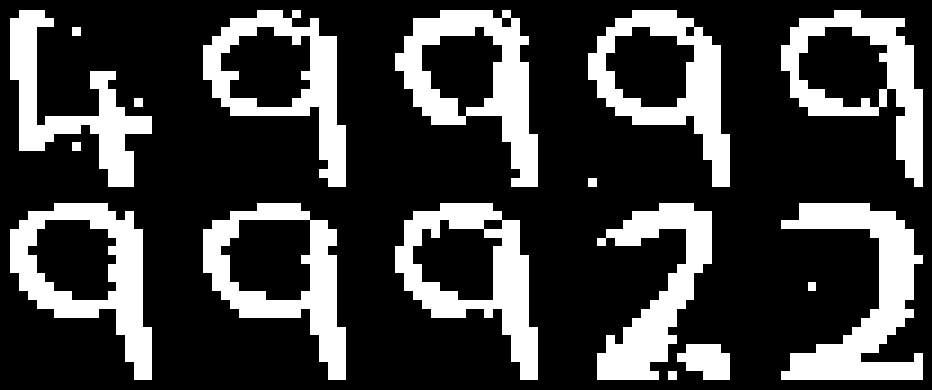

3
training with epochs = 1000 
neurons = [320, 64, 64, 64, 64] 
learning_rate =  0.01 
batch_size =  50 
on characters :  [2, 4, 9, 16]


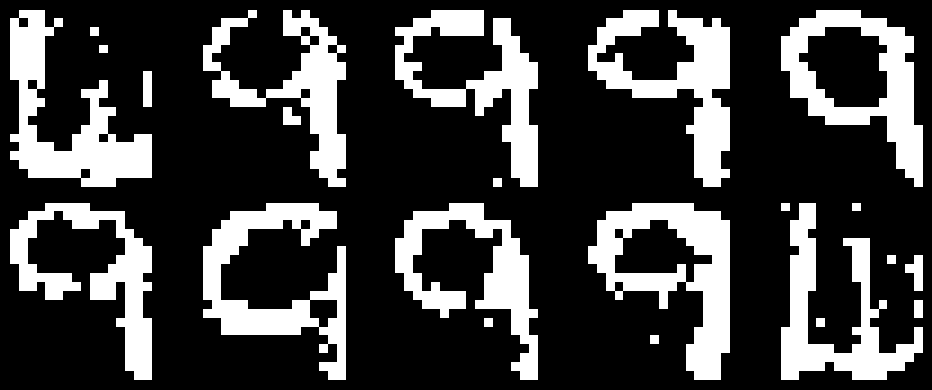

In [16]:
neurons = [320, 64, 64, 64, 64]
epochs = 1000
learning_rate = 0.01
batch_size = 50
characters_index = [[2], [2, 4], [2, 4, 9], [2, 4, 9, 16]]


for index in range(4):
    image =lire_alpha_digit('/Users/pierrefihey/Desktop/DLII/binaryalphadigs.mat', characters_index[index])
    rbm_list = init_DBN(neurons)
    rbm_list, loss = train_DBN(rbm_list, image, epochs, learning_rate, batch_size)

    print('training with epochs =' , epochs, '\nneurons =', neurons, '\nlearning_rate = ', learning_rate, '\nbatch_size = ' , batch_size, '\non characters : ', characters_index[index])
    n_iter = 1000
    n_imgs = 10

    generer_image_DBN(rbm_list, n_imgs, n_iter)